In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
validate = pd.read_csv("validation.csv")

for i in train.columns:
    print(i)

# print(train["profit_margin"])

X_train = train.drop(["profit_margin"], axis=1)
X_test = test.drop(["profit_margin"], axis=1)
X_val = validate.drop(["profit_margin"], axis=1)
y_train = train["profit_margin"]
y_test = test["profit_margin"]
y_val = validate["profit_margin"]

# X_train_c = pd.concat([X_train, X_val], axis=0)
# y_train_c = pd.concat([y_train, y_val], axis=0)

# # print(len(train.columns))
# # print(len(X_train.columns))
# # print(y_train)

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


popularity
budget
runtime
vote_average
vote_count
profit_margin
overview: life
overview: new
overview: young
overview: man
overview: family
overview: world
overview: love
overview: woman
overview: story
overview: finds
overview: father
overview: friends
overview: time
overview: years
overview: old
overview: help
overview: war
overview: wife
overview: school
overview: town
genres: Documentary
genres: Romance
genres: Animation
genres: Family
genres: Mystery
genres: Adventure
genres: Comedy
genres: Music
genres: War
genres: TV Movie
genres: Fantasy
genres: Western
genres: Action
genres: Horror
genres: History
genres: Drama
genres: Thriller
genres: Science Fiction
genres: Crime
original_language_cn
original_language_de
original_language_en
original_language_es
original_language_fr
original_language_hi
original_language_it
original_language_ja
original_language_ko
original_language_ml
original_language_other
original_language_ru
original_language_ta
original_language_te
original_language_tr

In [5]:
nn_base = MLPRegressor( max_iter=100, random_state=42)
train_losses = []
val_losses = []

# Training loop
for epoch in range(1, 101):  # Adjust the number of epochs as needed
    nn_base.partial_fit(X_train, y_train)  # Incremental training for better loss tracking
    train_loss = nn_base.loss_
    y_val_pred = nn_base.predict(X_val)
    val_loss = metrics.mean_squared_error(y_val, y_val_pred)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"Epoch {epoch}, Training Loss: {train_loss}, Validation Loss: {val_loss}")


Epoch 1, Training Loss: 0.8163966481908982, Validation Loss: 0.7596861599814694
Epoch 2, Training Loss: 0.33037497835945434, Validation Loss: 0.6796881151690779
Epoch 3, Training Loss: 0.2970069649348952, Validation Loss: 0.6380713941132434
Epoch 4, Training Loss: 0.2792852169726246, Validation Loss: 0.6095021822924168
Epoch 5, Training Loss: 0.26774667475571245, Validation Loss: 0.5886206553100519
Epoch 6, Training Loss: 0.2588722849169125, Validation Loss: 0.5703623258897845
Epoch 7, Training Loss: 0.2513110095767465, Validation Loss: 0.5535598933254943
Epoch 8, Training Loss: 0.24441708661147682, Validation Loss: 0.5396356619932354
Epoch 9, Training Loss: 0.23846386761208854, Validation Loss: 0.5282416092434644
Epoch 10, Training Loss: 0.23347012556781085, Validation Loss: 0.5191339982640678
Epoch 11, Training Loss: 0.22904000100448602, Validation Loss: 0.5109070609728383
Epoch 12, Training Loss: 0.22510460650285075, Validation Loss: 0.5046606380023847
Epoch 13, Training Loss: 0.221

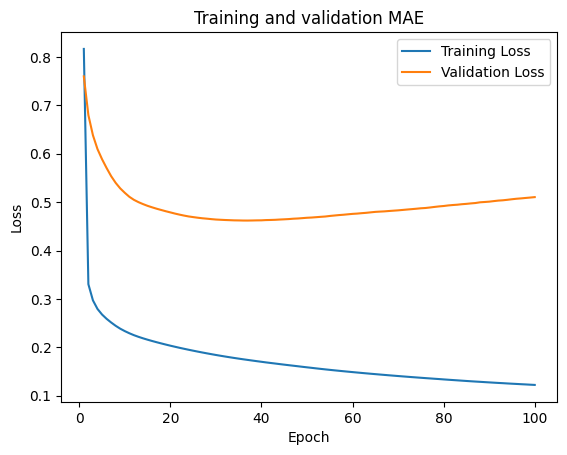

Score: 0.13940885706299688
Predicted values are: 

0 1.235058880714146
1 1.83608885356413
2 0.2516174266725757
3 2.444098015539453
4 2.5230280968999885
5 1.7834963043870231
6 1.930968751730052
7 0.7649175221452522
8 1.87519595321509
9 1.5081740725375727
Real values are: 
 0    1.952223
1    1.808206
2    0.872858
3    1.915541
4    0.959189
5    1.974381
6    2.459933
7    0.237414
8    0.958179
9    0.073892
Name: profit_margin, dtype: float64


In [7]:
plt.figure()
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.title('Training and validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("Score:",nn_base.score(X_test, y_test))
predictions = nn_base.predict(X_test[:10])
print("Predicted values are: \n")
for i, val in enumerate(predictions):
    print(i,val)
print("Real values are: \n", y_test[:10])


In [8]:

y_pred = nn_base.predict(X_test)
print("-- BASE MODEL --")
mse = metrics.mean_squared_error(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)
print('Mean squared error: ', mse)
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)
print('Mean absolute error: ', mae)

-- BASE MODEL --
Mean squared error:  0.5201296092950389
Root mean squared error:  0.7212001173703724
Mean absolute error:  0.5681387677108694


In [88]:
nn_hyperparam = MLPRegressor(hidden_layer_sizes=(40, 30, 20, 10, 1), verbose = True, activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='adaptive', learning_rate_init=0.001, tol=0.0001,validation_fraction = 0.2, early_stopping=True).fit(X_train, y_train)


Iteration 1, loss = 5.24789002
Validation score: -17.798766
Iteration 2, loss = 5.16959549
Validation score: -17.517746
Iteration 3, loss = 5.09211345
Validation score: -17.240833
Iteration 4, loss = 5.01568602
Validation score: -16.966656
Iteration 5, loss = 4.94018274
Validation score: -16.697230
Iteration 6, loss = 4.86576073
Validation score: -16.430188
Iteration 7, loss = 4.79196592
Validation score: -16.165981
Iteration 8, loss = 4.71906164
Validation score: -15.905131
Iteration 9, loss = 4.64698720
Validation score: -15.647242
Iteration 10, loss = 4.57589342
Validation score: -15.391925
Iteration 11, loss = 4.50551636
Validation score: -15.141047
Iteration 12, loss = 4.43616984
Validation score: -14.892070
Iteration 13, loss = 4.36747094
Validation score: -14.646150
Iteration 14, loss = 4.29969313
Validation score: -14.403822
Iteration 15, loss = 4.23276295
Validation score: -14.164132
Iteration 16, loss = 4.16671507
Validation score: -13.927033
Iteration 17, loss = 4.07434463
V

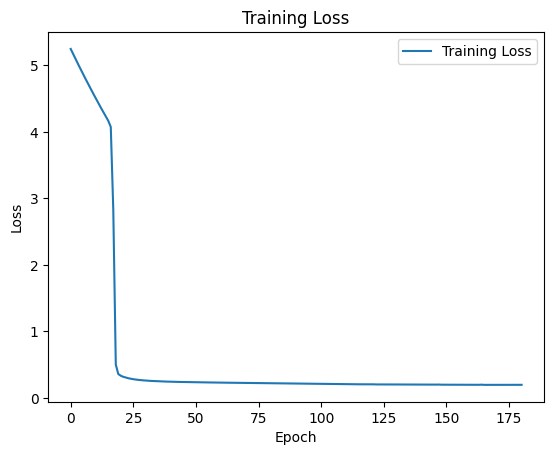

Score: 0.27025702412414065
Predicted values are: 

0 1.833208389651048
1 1.7655734140412533
2 0.7039420237664791
3 2.833615400639891
4 2.313498591225871
5 1.7505571307477912
6 1.7477411465291997
7 0.834030354726002
8 1.6226801853333594
9 1.4821157735680577
Real values are: 
 0    1.952223
1    1.808206
2    0.872858
3    1.915541
4    0.959189
5    1.974381
6    2.459933
7    0.237414
8    0.958179
9    0.073892
Name: profit_margin, dtype: float64


In [89]:
plt.figure()
plt.plot( nn_hyperparam.loss_curve_, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("Score:",nn_hyperparam.score(X_test, y_test))
predictions = nn_hyperparam.predict(X_test[:10])
print("Predicted values are: \n")
for i, val in enumerate(predictions):
    print(i,val)
print("Real values are: \n", y_test[:10])

In [90]:

y_pred = nn_hyperparam.predict(X_test)
print("-- HYPERPARAM MODEL --")
mse = metrics.mean_squared_error(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)
print('Mean squared error: ', mse)
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)
print('Mean absolute error: ', mae)

-- HYPERPARAM MODEL --
Mean squared error:  0.4410467526225683
Root mean squared error:  0.6641135088390901
Mean absolute error:  0.5265290687810906


# Model 1

In [14]:
# define the model
model_1 = Sequential()
model_1.add(Dense(128, input_dim=60, activation='relu'))
model_1.add(Dense(64, activation='relu'))
#Output layer
model_1.add(Dense(1, activation='linear'))

model_1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model_1.summary()

history_1 = model_1.fit(X_train, y_train, epochs =100, validation_data=(X_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               7808      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,129
Trainable params: 16,129
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
190/190 [==============================] - 1s 1ms/step - loss: 0.6924 - mean_absolute_error: 0.6806 - val_loss: 0.5510 - val_mean_absolute_error: 0.6345
Epoch 2/100
190/190 [==============================] - 0s 687us/step - loss: 0.4756 - mean_absolute_error: 0.5666 - val_loss: 0.4905 - val_mean_absolute_error: 0.5924
Epoch 3/100
190/190 [==============================] - 0s 691us/step - loss: 0.4317 - mean_absolute_error: 0.5340 - val_loss: 0.4714 - val_mean_absolute_error: 0.5674
Epoch 4/100
190/190 [==============================] - 0s 679us/step - loss: 0.4068 - mean_absolute_error: 0.5156 - val_loss: 0.4715 - val_mean_absolute_error: 0.5605
Epoch 5/100
190/190 [==============================] - 0s 664us/step - loss: 0.3886 - mean_absolute_error: 0.5020 - val_loss: 0.4589 - val_mean_absolute_error: 0.5554
Epoch 6/100
190/190 [==============================] - 0s 704us/step - loss: 0.3685 - mean_absolute_error: 0.4888 - val_loss: 0.4606 - val_mean_absolute_error: 0.5520


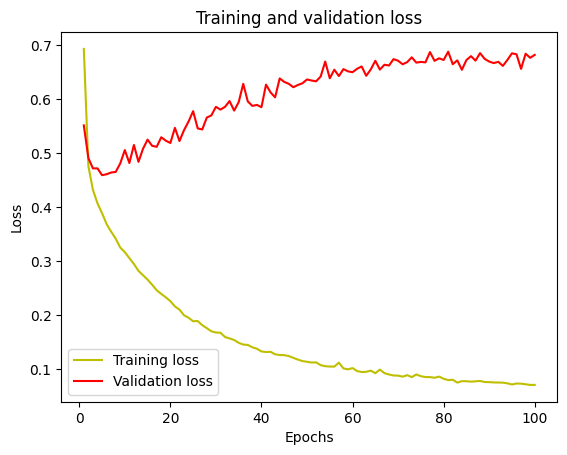

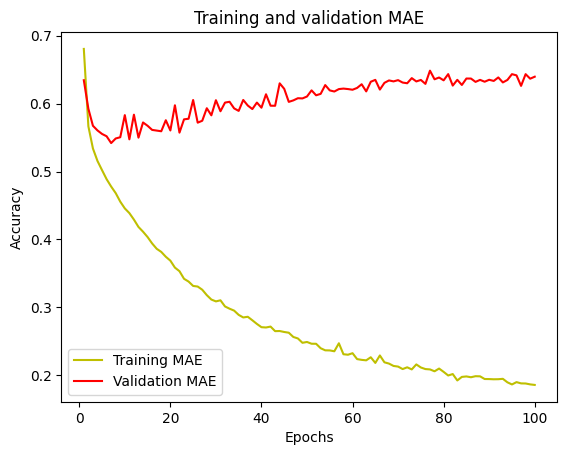

1/1 [==============================] - 0s 48ms/step
Predicted values are: 
 [[1.3893911]
 [1.5097378]
 [0.6621645]
 [2.4230418]
 [2.893061 ]
 [1.6134568]
 [2.4997618]
 [0.2849632]
 [2.0196924]
 [1.8155345]]
Real values are: 
 0    1.952223
1    1.808206
2    0.872858
3    1.915541
4    0.959189
5    1.974381
6    2.459933
7    0.237414
8    0.958179
9    0.073892
Name: profit_margin, dtype: float64


In [15]:
from matplotlib import pyplot as plt

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history_1.history['mean_absolute_error']
val_acc = history_1.history['val_mean_absolute_error']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

predictions = model_1.predict(X_test[:10])
print("Predicted values are: \n", predictions)
print("Real values are: \n", y_test[:10])

# Model 2 - More hidden layers

In [16]:
# define the model
model_2 = Sequential()
model_2.add(Dense(50, input_dim=60, activation='relu'))
# model_2.add(Dense(256, activation='relu'))
# model_2.add(Dense(512, activation='relu'))
model_2.add(Dense(40, activation='relu'))
model_2.add(Dense(30, activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(10, activation='relu'))
#Output layer
model_2.add(Dense(1, activation='linear'))

model_2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model_2.summary()

history_2 = model_2.fit(X_train, y_train, epochs =200, validation_data=(X_val, y_val))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                3050      
                                                                 
 dense_7 (Dense)             (None, 40)                2040      
                                                                 
 dense_8 (Dense)             (None, 30)                1230      
                                                                 
 dense_9 (Dense)             (None, 20)                620       
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 7,161
Trainable params: 7,161
Non-traina

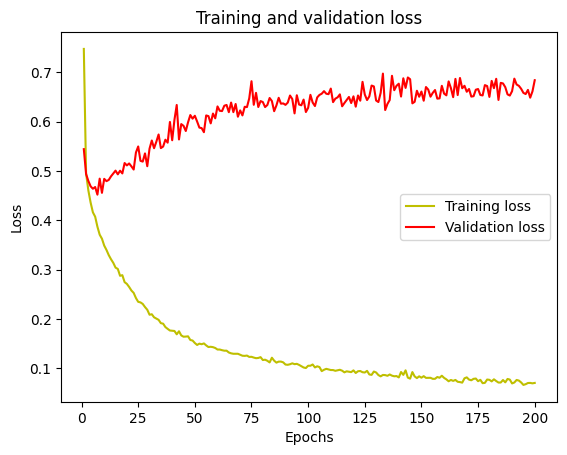

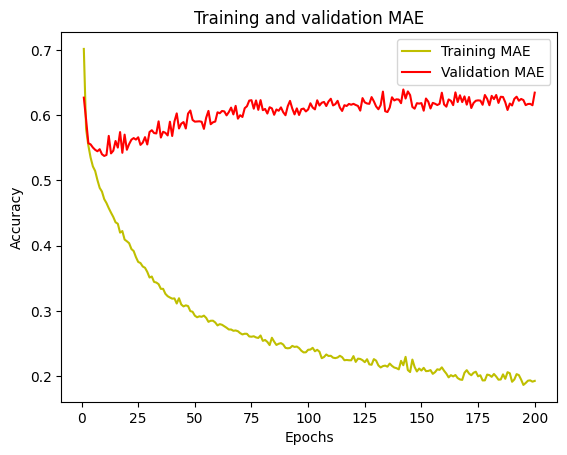

1/1 [==============================] - 0s 40ms/step
Predicted values are: 

0 [2.1030872]
1 [2.2032907]
2 [0.15934801]
3 [2.4566476]
4 [2.4505053]
5 [1.779605]
6 [2.2236435]
7 [1.1729102]
8 [1.8901045]
9 [1.3199794]
Real values are: 
 0    1.952223
1    1.808206
2    0.872858
3    1.915541
4    0.959189
5    1.974381
6    2.459933
7    0.237414
8    0.958179
9    0.073892
Name: profit_margin, dtype: float64


In [17]:
from matplotlib import pyplot as plt

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history_2.history['mean_absolute_error']
val_acc = history_2.history['val_mean_absolute_error']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

predictions = model_2.predict(X_test[:10])
print("Predicted values are: \n")
for i,p in enumerate(predictions):
    print(i,p)
print("Real values are: \n", y_test[:10])

# Model 3 Different inputs for hidden layers

In [19]:
import tensorflow as tf
# define the model
model_3 = Sequential()
model_3.add(Dense(100, input_dim=60, activation='relu'))
model_3.add(Dense(300, activation='relu'))
model_3.add(Dense(500, activation='relu'))
model_3.add(Dense(300, activation='relu'))
model_3.add(Dense(100, activation='relu'))
#Output layer
model_3.add(Dense(1, activation='linear'))

opt =  tf.keras.optimizers.Adam()

model_3.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model_3.summary()

history_3 = model_3.fit(X_train, y_train, epochs =200, validation_data=(X_test, y_test))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               6100      
                                                                 
 dense_19 (Dense)            (None, 300)               30300     


                                                                 
 dense_20 (Dense)            (None, 500)               150500    
                                                                 
 dense_21 (Dense)            (None, 300)               150300    
                                                                 
 dense_22 (Dense)            (None, 100)               30100     
                                                                 
 dense_23 (Dense)            (None, 1)                 101       
                                                                 
Total params: 367,401
Trainable params: 367,401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
190/190 [==============================] - 1s 2ms/step - loss: 0.5771 - mean_absolute_error: 0.6232 - val_loss: 0.5182 - val_mean_absolute_error: 0.6013
Epoch 2/200
190/190 [==============================] - 0s 2ms/step - loss: 0.4617 - mean_absolute_error

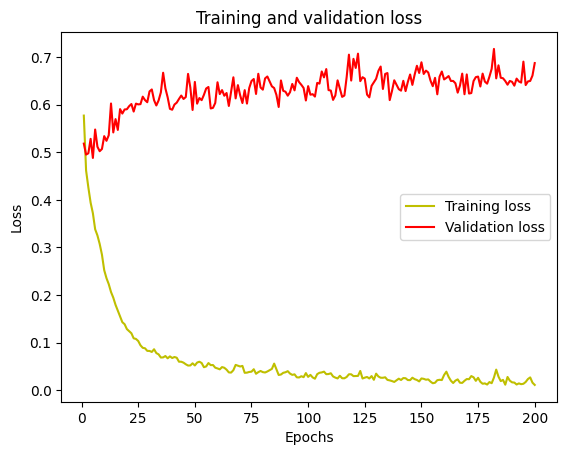

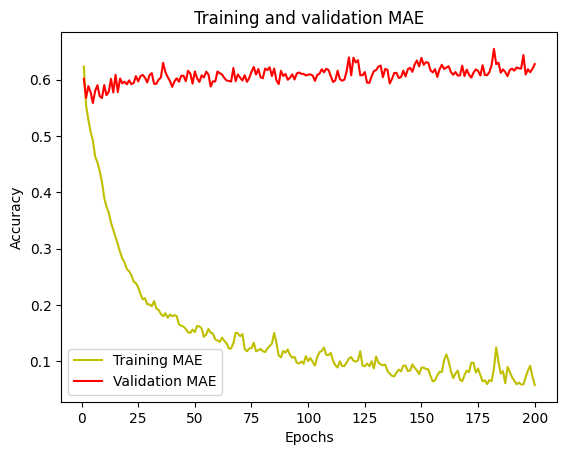

1/1 [==============================] - 0s 38ms/step
Predicted values are: 

0 [1.910835]
1 [2.388588]
2 [0.22408172]
3 [2.6779413]
4 [2.5806746]
5 [1.6898347]
6 [2.1425986]
7 [0.26021585]
8 [1.9552336]
9 [1.694574]
Real values are: 
 0    1.952223
1    1.808206
2    0.872858
3    1.915541
4    0.959189
5    1.974381
6    2.459933
7    0.237414
8    0.958179
9    0.073892
Name: profit_margin, dtype: float64


In [20]:
from matplotlib import pyplot as plt

loss = history_3.history['loss']
val_loss = history_3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history_3.history['mean_absolute_error']
val_acc = history_3.history['val_mean_absolute_error']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

predictions = model_3.predict(X_test[:10])
print("Predicted values are: \n")
for i,p in enumerate(predictions):
    print(i,p)
print("Real values are: \n", y_test[:10])

# Analysis

In [21]:
print("-- MODEL 1 --")
mse, mae = model_1.evaluate(X_test, y_test)
print('Mean squared error: ', mse)
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)
print('Mean absolute error: ', mae)

print("-- MODEL 2 --")
mse, mae = model_2.evaluate(X_test, y_test)
print('Mean squared error: ', mse)
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)
print('Mean absolute error: ', mae)

print("-- MODEL 3 --")
mse, mae = model_3.evaluate(X_test, y_test)
print('Mean squared error: ', mse)
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)
print('Mean absolute error: ', mae)

-- MODEL 1 --
24/24 [==============================] - 0s 566us/step - loss: 0.6889 - mean_absolute_error: 0.6559
Mean squared error:  0.6888536810874939
Root mean squared error:  0.8299720965716221
Mean absolute error:  0.6558899879455566
-- MODEL 2 --
24/24 [==============================] - 0s 544us/step - loss: 0.6986 - mean_absolute_error: 0.6356
Mean squared error:  0.6986200213432312
Root mean squared error:  0.8358349246969949
Mean absolute error:  0.6356168389320374
-- MODEL 3 --
24/24 [==============================] - 0s 806us/step - loss: 0.6875 - mean_absolute_error: 0.6276
Mean squared error:  0.68746417760849
Root mean squared error:  0.8291345955925914
Mean absolute error:  0.6275588274002075


In [55]:
import scipy.stats as stats

pred = model_2.predict(X_test)
pred[pred < 0] = 0.0

tstat, t_pval = stats.ttest_ind(a=pred, b=y_test, equal_var=True)
print("T-Statistic: " + str(tstat.round(3)), "PValue: " + str(t_pval.round(3)))

27/27 [==============================] - 0s 1ms/step
T-Statistic: [-0.977  0.9   -0.165  1.689  0.876 -0.854  0.737  0.365 -1.275  1.692
 -0.871 -0.017 -1.178  1.622  0.253  1.655  1.593 -0.489  1.335 -0.875
 -0.71   0.365 -0.257 -0.751  1.629 -1.225 -0.678 -0.435  0.056  0.59
 -0.51  -0.747 -0.473 -0.634  1.693  1.32  -1.345 -1.345  1.637  1.451
 -1.089  0.791  1.222 -1.308 -0.458  1.532 -0.932 -0.545 -0.73   0.984
  1.649 -1.345  0.574  1.365  1.455  0.561 -0.084 -0.745 -0.637  0.127
  0.056 -0.382 -0.516  1.565 -0.686 -0.334  0.589 -0.643 -0.625 -1.289
  1.693  0.521 -0.317 -0.43   1.692 -0.995  1.693  1.522  0.548 -0.81
 -0.262  1.263  1.693  0.031  0.43  -0.945 -1.087 -0.327 -0.894 -1.292
 -0.163  1.054 -0.358  1.344  0.587 -0.676 -0.656 -0.923 -0.879 -0.747
  1.693  1.394  1.052 -0.684 -0.149 -0.707 -0.761 -1.219  1.693 -0.736
 -0.467 -1.007 -0.621 -1.043 -0.747 -1.074  1.602 -0.237  1.693 -0.747
 -1.345  1.661  0.03   1.09  -0.74  -0.522  1.07   1.134 -0.366  1.621
  0.031 -0.24